<a href="https://colab.research.google.com/github/idontcalculate/DAT5/blob/master/ASL_plus_model7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASL to Text

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kaggle
!mkdir /root/.kaggle/
!touch /root/.kaggle/kaggle.json
!echo '{"username":"tensorflowcolab","key":"883e5dc4a7759495e6fb43d9d5138528"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle -h
!kaggle datasets download -d grassknoted/asl-alphabet

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings
100% 1.02G/1.03G [00:09<00:00, 94.6MB/s]
100% 1.03G/1.03G [00:10<00:00, 110MB/s] 


In [ ]:
print("Let's start")

Let's start


In [ ]:
from zipfile import ZipFile


In [ ]:
!wget kaggle datasets download -d https://www.kaggle.com/grassknoted/asl-alphabet

DEBUG output created by Wget 1.19.4 on linux-gnu.

Reading HSTS entries from /root/.wget-hsts
URI encoding = ‘UTF-8’
Converted file name 'index.html' (UTF-8) -> 'index.html' (UTF-8)
--2021-07-11 12:33:34--  http://kaggle/
Resolving kaggle (kaggle)... failed: Name or service not known.
wget: unable to resolve host address ‘kaggle’
URI encoding = ‘UTF-8’
Converted file name 'index.html' (UTF-8) -> 'index.html' (UTF-8)
--2021-07-11 12:33:34--  http://datasets/
Resolving datasets (datasets)... failed: Name or service not known.
wget: unable to resolve host address ‘datasets’
URI encoding = ‘UTF-8’
Converted file name 'index.html' (UTF-8) -> 'index.html' (UTF-8)
--2021-07-11 12:33:34--  http://download/
Resolving download (download)... failed: No address associated with hostname.
wget: unable to resolve host address ‘download’
URI encoding = ‘UTF-8’
Converted file name 'asl-alphabet' (UTF-8) -> 'asl-alphabet' (UTF-8)
--2021-07-11 12:33:34--  https://www.kaggle.com/grassknoted/asl-alphabet
R

In [ ]:
with ZipFile('/content/asl-alphabet.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

## Get the Data

In [ ]:
alphabets = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q",
             "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "del", "nothing", "space"])
letters = [f'/content/asl_alphabet_train/asl_alphabet_train/{letter}/' for letter in alphabets]

letters

['/content/asl_alphabet_train/asl_alphabet_train/A/',
 '/content/asl_alphabet_train/asl_alphabet_train/B/',
 '/content/asl_alphabet_train/asl_alphabet_train/C/',
 '/content/asl_alphabet_train/asl_alphabet_train/D/',
 '/content/asl_alphabet_train/asl_alphabet_train/E/',
 '/content/asl_alphabet_train/asl_alphabet_train/F/',
 '/content/asl_alphabet_train/asl_alphabet_train/G/',
 '/content/asl_alphabet_train/asl_alphabet_train/H/',
 '/content/asl_alphabet_train/asl_alphabet_train/I/',
 '/content/asl_alphabet_train/asl_alphabet_train/J/',
 '/content/asl_alphabet_train/asl_alphabet_train/K/',
 '/content/asl_alphabet_train/asl_alphabet_train/L/',
 '/content/asl_alphabet_train/asl_alphabet_train/M/',
 '/content/asl_alphabet_train/asl_alphabet_train/N/',
 '/content/asl_alphabet_train/asl_alphabet_train/O/',
 '/content/asl_alphabet_train/asl_alphabet_train/P/',
 '/content/asl_alphabet_train/asl_alphabet_train/Q/',
 '/content/asl_alphabet_train/asl_alphabet_train/R/',
 '/content/asl_alphabet_trai

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(letters[0]) if isfile(join(letters[0], f))]

ids = []
for pic in onlyfiles:
  for let in alphabets:
    ids.append(pic.replace('.jpg', '')[1:])
len(ids)

87000

In [ ]:
image_paths = []
for letter in letters:
  for id in ids:
    path = letter + alphabets[letters.index(letter)] + id + '.jpg'
    image_paths.append(path)

image_paths

['/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A812.jpg',
 '/conte

In [ ]:
image_paths = list(set(image_paths))

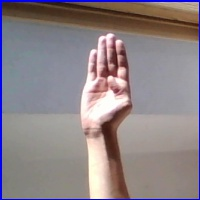

In [ ]:
from IPython.display import Image

Image(image_paths[0])

In [ ]:
idandlabels = []
for image_path in image_paths:
  first_step = image_path.replace('/content/asl_alphabet_train/asl_alphabet_train/', '')
  second_step = first_step.split('/')[1]
  third_step = second_step.replace(".jpg", '')
  idandlabels.append(third_step)

idandlabels[6]

'F523'

In [ ]:
ids_for_df = []
labels_for_df = []
for string in idandlabels:
  id = ''
  label = ''
  for char in string:
    if char.isnumeric():
      id += char
    else:
      label += char
  ids_for_df.append(id)
  labels_for_df.append(label)

labels_for_df[0], ids_for_df[0]

('B', '424')

In [ ]:
labels_df = pd.DataFrame(data={'ids':ids_for_df, 'labels': labels_for_df})
labels_df.head()

,ids,labels
0,424,B
1,1252,A
2,2976,U
3,1071,P
4,709,U


In [ ]:
labels_df.tail()

,ids,labels
86995,1175,V
86996,411,K
86997,202,D
86998,694,P
86999,1964,S


In [ ]:
# labels_df.sort_values(by=['labels', 'ids'], ignore_index=True, inplace=True)
len(labels_df)

87000

yasssssssss!!!!

In [ ]:
np.array(labels_df.labels)[0] == np.array(alphabets)

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

What next:

* convert every label to an array of bools
* Numerically encode them
* Convert the images and batch them up
* Modelling
* Improving
* Deploy

In [ ]:
labels = labels_df['labels']
boolean_labels = [label == alphabets for label in labels]
boolean_labels[:2]

[array([False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False])]

In [ ]:
from matplotlib.pyplot import imread

image = imread(image_paths[10000])
image.shape

(200, 200, 3)

In [ ]:
# 224 as the model we are going to use requires it to be so
def process_image(image_path):
  """
  Takes an image path and coverts the image into Tensors
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  
  # Turn the image into numerical tensor with three colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) # the function scales the data from 0-255 to 0-1
  
  # return the image
  return image

def get_labels(image, label):

  image = process_image(image)
  return image, label

get_labels(image_paths[0], tf.constant(labels[0]))

(<tf.Tensor: shape=(200, 200, 3), dtype=float32, numpy=
 array([[[0.        , 0.00392157, 0.9803922 ],
         [0.        , 0.00392157, 0.96470594],
         [0.02352941, 0.        , 0.9294118 ],
         ...,
         [0.        , 0.        , 0.9294118 ],
         [0.        , 0.        , 0.96470594],
         [0.        , 0.        , 0.9490197 ]],
 
        [[0.        , 0.        , 0.96470594],
         [0.00784314, 0.        , 0.9058824 ],
         [0.05490196, 0.02352941, 0.80392164],
         ...,
         [0.01568628, 0.        , 0.7137255 ],
         [0.01176471, 0.        , 0.8117648 ],
         [0.00784314, 0.01176471, 0.854902  ]],
 
        [[0.02745098, 0.        , 0.9607844 ],
         [0.05882353, 0.02352941, 0.8196079 ],
         [0.13725491, 0.09803922, 0.54901963],
         ...,
         [0.6509804 , 0.6039216 , 0.86274517],
         [0.6117647 , 0.57254905, 1.        ],
         [0.04705883, 0.02352941, 0.61960787]],
 
        ...,
 
        [[0.01960784, 0.        

In [ ]:
from sklearn.model_selection import train_test_split
SMALL_SIZE = 10000

X = image_paths
y = boolean_labels

X_train, X_val, y_train, y_val = train_test_split(X[:SMALL_SIZE],
                                                  y[:SMALL_SIZE],
                                                  test_size=0.2)

In [ ]:
BATCH_SIZE = 32

def create_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it's validation data.
  Also accepts test data as input (no labels).
  '''

  # If the data is test data, we don't have labels
  if test_data:
    print('Creating test batches...')
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) # no labels
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  # if the data is  validation data, we don't need to shuffle the data
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data_batch = data.map(get_labels).batch(batch_size)
    return data_batch
  
  # If neither, it will be training data. We need to shuffle the data
  else:
    print('Creating training data batches...')
    # Turn file paths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))   
    # Shuffle the data
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_labels).batch(batch_size)
    return data_batch

In [ ]:
train_data = create_batches(X_train, y_train)
val_data = create_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


# Modelling

In [ ]:
from tensorflow.keras.applications import MobileNet
import tensorflow_hub as hub
def create_model(input_shape= (200, 200, 3), output_shape= 29, lr=0.001):
  # print('Building model with:', model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
     MobileNet(input_shape=input_shape, weights=None, include_top=True, classes=output_shape),
     tf.keras.layers.Dense(units=output_shape, # Layer 1: Inupt
                           activation='softmax') # Layer 2: Output layer
  ])
  # model = MobileNet(input_shape=input_shape, weights=None, include_top=False)
  # model = tf.keras.layers.Dense(units=output_shape, activation='softmax') (model)
  # model = tf.keras.Sequential([
  #    hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4', weights=None),
  #    tf.keras.layers.Dense(units=output_shape, # Layer 1: Inupt
  #                          activation='softmax') # Layer 2: Output layer
  # ])


  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(0.0001),
      metrics=['accuracy']
  )

  # Build the model
  model.build(input_shape)
  
  return model

In [ ]:
model1 = create_model()

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_200 (Function (None, 29)                3258589   
_________________________________________________________________
dense (Dense)                (None, 29)                870       
Total params: 3,259,459
Trainable params: 3,237,571
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
 history1 = model1.fit(x= train_data,
            epochs= 5)

Epoch 1/5
250/250 [==============================] - 47s 116ms/step - loss: 3.3133 - accuracy: 0.0637
Epoch 2/5
250/250 [==============================] - 29s 116ms/step - loss: 3.1892 - accuracy: 0.1024
Epoch 3/5
250/250 [==============================] - 29s 116ms/step - loss: 3.0692 - accuracy: 0.1386
Epoch 4/5
250/250 [==============================] - 29s 116ms/step - loss: 2.9486 - accuracy: 0.1456
Epoch 5/5
250/250 [==============================] - 29s 116ms/step - loss: 2.8076 - accuracy: 0.1663


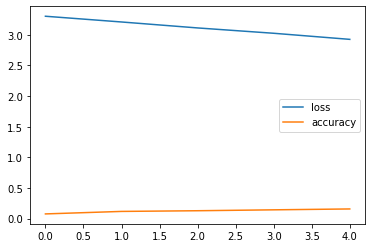

In [ ]:
pd.DataFrame(history1.history).plot();

In [ ]:
model2 = tf.keras.Sequential([
    MobileNet(input_shape=(200, 200, 3), weights=None, include_top=True, classes=29),
    tf.keras.layers.Dense(units=29, # Layer 1: Inupt
                          activation='softmax') # Layer 2: Output layer
])


# Compile the model
model2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.000023),
    metrics=['accuracy']
)

# Build the model
model2.build((200, 200, 3))
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit the model
history2 = model2.fit(x= train_data,
            epochs= 20,
            callbacks=[lr_scheduler])

Epoch 1/20
250/250 [==============================] - 30s 114ms/step - loss: 3.3080 - accuracy: 0.0597
Epoch 2/20
250/250 [==============================] - 29s 114ms/step - loss: 3.1996 - accuracy: 0.0918
Epoch 3/20
250/250 [==============================] - 28s 114ms/step - loss: 3.0908 - accuracy: 0.1115
Epoch 4/20
250/250 [==============================] - 28s 111ms/step - loss: 3.0011 - accuracy: 0.1139
Epoch 5/20
250/250 [==============================] - 28s 114ms/step - loss: 2.9308 - accuracy: 0.1266
Epoch 6/20
250/250 [==============================] - 28s 114ms/step - loss: 2.8150 - accuracy: 0.1325
Epoch 7/20
250/250 [==============================] - 29s 116ms/step - loss: 2.8016 - accuracy: 0.1269
Epoch 8/20
250/250 [==============================] - 29s 116ms/step - loss: 2.7514 - accuracy: 0.1305
Epoch 9/20
250/250 [==============================] - 28s 114ms/step - loss: 2.6582 - accuracy: 0.1398
Epoch 10/20
250/250 [==============================] - 29s 115ms/step - l

In [ ]:
model2.evaluate(val_data)

63/63 [==============================] - 2s 21ms/step - loss: 3.1755 - accuracy: 0.1450


[3.175471305847168, 0.14499999582767487]

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-3 * (10 ** (tf.range(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history2.history["loss"])
plt.xlabel("Learning rate")
plt.xlim([1e-3, 1e-2])
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

In [ ]:
model3 = tf.keras.Sequential([
    MobileNet(input_shape=(200, 200, 3), weights=None, include_top=True, classes=29),
    tf.keras.layers.Dense(units=29, # Layer 1: Inupt
                          activation='softmax') # Layer 2: Output layer
])


# Compile the model
model3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0023),
    metrics=['accuracy']
)

# Build the model
model3.build((200, 200, 3))
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit the model
history3 = model3.fit(x= train_data,
            epochs= 50)

In [ ]:
model3.summary()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

model4 = tf.keras.Sequential([
    # MobileNet(input_shape=(200, 200, 3), weights=None, include_top=True),
    ResNet50(input_shape=(200, 200, 3), weights=None, classes=29),
    tf.keras.layers.Dense(units=29, # Layer 1: Inupt
                          activation='softmax') # Layer 2: Output layer
])


# Compile the model
model4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0023),
    metrics=['accuracy']
)

# Build the model
model4.build((200, 200, 3))
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit the model
history4 = model4.fit(x= train_data,
            epochs= 50)

In [ ]:
model5 = tf.keras.Sequential([
    MobileNet(input_shape=(200, 200, 3), weights=None, include_top=True, classes=29),
    tf.keras.layers.Dense(units=29, # Layer 1: Inupt
                          activation='softmax') # Layer 2: Output layer
])


# Compile the model
model5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0023),
    metrics=['accuracy']
)

# Build the model
model5.build((200, 200, 3))
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit the model
history5 = model3.fit(x= train_data,
            epochs= 100)

Epoch 1/100
250/250 [==============================] - 36s 142ms/step - loss: 2.5224 - accuracy: 0.1329
Epoch 2/100
250/250 [==============================] - 36s 143ms/step - loss: 2.4359 - accuracy: 0.1486
Epoch 3/100
250/250 [==============================] - 36s 145ms/step - loss: 2.3520 - accuracy: 0.1586
Epoch 4/100
250/250 [==============================] - 36s 146ms/step - loss: 2.2759 - accuracy: 0.1635
Epoch 5/100
250/250 [==============================] - 37s 147ms/step - loss: 2.2238 - accuracy: 0.1719
Epoch 6/100
250/250 [==============================] - 37s 147ms/step - loss: 2.1960 - accuracy: 0.1765
Epoch 7/100
250/250 [==============================] - 37s 148ms/step - loss: 2.1459 - accuracy: 0.1996
Epoch 8/100
250/250 [==============================] - 37s 148ms/step - loss: 2.0931 - accuracy: 0.2425
Epoch 9/100
250/250 [==============================] - 38s 150ms/step - loss: 2.0166 - accuracy: 0.2713
Epoch 10/100
250/250 [==============================] - 37s 149m

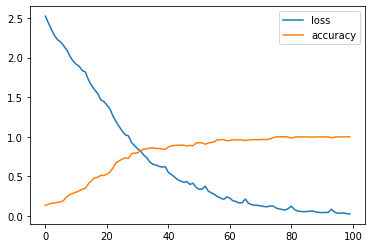

In [ ]:
pd.DataFrame(history5.history).plot();

In [ ]:
def save_model(model, suffix=None):
  import os
  import datetime
  '''
  Saves a givern model in a directory and appends a suffix
  '''

  # Create a model directory pathname with current time
  modeldir = os.path.join('/content/drive/MyDrive/Colab Notebooks/ASL/models',
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + '.h5' #h5 is like .pkl or .joblib
  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path
saved = save_model(model5, suffix='10k-100-epochs')

Saving model to: /content/drive/MyDrive/Colab Notebooks/ASL/models/20210709-131949-10k-100-epochs.h5...


In [ ]:
preds = model5.predict(val_data)
len(preds[0])

29

In [ ]:
def preds_to_text(prediction_proba):
  '''
  Turns an array of prediction probabilities into a label
  '''

  return alphabets[np.argmax(prediction_proba)]


'Y'

'/content/asl_alphabet_train/asl_alphabet_train/Q/Q1058.jpg'

In [ ]:
model5.evaluate(val_data)

63/63 [==============================] - 3s 33ms/step - loss: 3.3688 - accuracy: 0.0325


[3.3687562942504883, 0.032499998807907104]

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [ ]:
import datetime
import os

# Create a function to build a tensorboard callback
def create_tensorboard_callback():
  # Create a log directory fro storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Colab Notebooks/ASL/logs",
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
model6 = tf.keras.Sequential([
    MobileNet(input_shape=(200, 200, 3), weights=None, include_top=True, classes=29),
    tf.keras.layers.Dense(units=29, # Layer 1: Inupt
                          activation='softmax') # Layer 2: Output layer
])


# Compile the model
model6.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0023),
    metrics=['accuracy']
)

# Build the model
model6.build((200, 200, 3))

# Create new TensorBoard seesion everytime we train a model
tensorboard = create_tensorboard_callback()

# Fit the model
history6 = model6.fit(x= train_data,
                      epochs= 100,
                      callbacks=[early_stopping, tensorboard],
                      validation_data=val_data)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

big_one = tf.keras.Sequential([
    MobileNetV2(input_shape=(200, 200, 3), weights=None, include_top=True, classes=1024),
    tf.keras.layers.Reshape((32, 32, 1), weights=None, input_shape=(None, 1024)),
    ResNet50(input_shape=(32, 32, 1), weights=None, classes=29),
    tf.keras.layers.Dense(units=29, # Layer 1: Inupt
                          activation='softmax') # Layer 2: Output layer
], name="Big-Model")

big_one.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(0.0023),
               metrics=["accuracy"])
big_one.build((200, 200, 3))

big_one.summary()

Model: "Big-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_200 (Functi (None, 1024)              3569728   
_________________________________________________________________
reshape_8 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
resnet50 (Functional)        (None, 29)                23640861  
_________________________________________________________________
dense_10 (Dense)             (None, 29)                870       
Total params: 27,211,459
Trainable params: 27,124,227
Non-trainable params: 87,232
_________________________________________________________________


In [ ]:
tensorboard = create_tensorboard_callback()

In [ ]:
big_one.fit(train_data,
            epochs=50,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[early_stopping, tensorboard])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/50
250/250 [==============================] - 65s 223ms/step - loss: 3.3676 - accuracy: 0.0394 - val_loss: 3.3707 - val_accuracy: 0.0365
Epoch 2/50
250/250 [==============================] - 54s 216ms/step - loss: 3.3651 - accuracy: 0.0429 - val_loss: 3.3694 - val_accuracy: 0.0360
Epoch 3/50
250/250 [==============================] - 54s 217ms/step - loss: 3.3666 - accuracy: 0.0395 - val_loss: 3.3874 - val_accuracy: 0.0410
Epoch 4/50
250/250 [==============================] - 55s 220ms/step - loss: 3.3676 - accuracy: 0.0402 - val_loss: 3.3856 - val_accuracy: 0.0410
Epoch 5/50
250/250 [==============================] - 57s 227ms/step - loss: 3.3625 - accuracy: 0.0421 - val_loss: 3.3940 - val_accuracy: 0.0400
Epoch 6/50
250/250 [==============================] - 57s 229ms/step - loss: 3.3564 - accuracy: 0.0461 - val_loss: 3.4102 - val_accuracy: 0.0400


In [ ]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/asl_alphabet_train/asl_alphabet_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear")
type(data)

Found 87000 files belonging to 29 classes.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
def unbatchify(batch, test=False):
  '''
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of imags and labels
  '''
  if not test:
    images = []
    labels = []
    # Loop through batched data
    for image, label in val_data.unbatch().as_numpy_iterator():
      images.append(image)
      labels.append(label)
    return np.array(images), np.array(labels)
  if test:
    custom_images = []
    # Look through unbatched data
    for image in custom_data.unbatch().as_numpy_iterator():
      custom_images.append(image)
      return custom_images

In [ ]:
images, labels = unbatchify(data)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(images, labels):
    strat_train_set = images[train_index], labels[train_index]
    strat_test_set = images[test_index], labels[test_index]

In [ ]:
alphabets[strat_train_set[1][0]]

array(['X'], dtype='<U7')

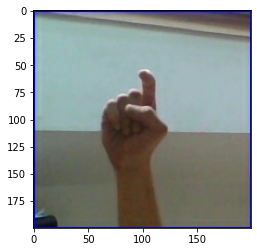

In [ ]:
plt.imshow(strat_train_set[0][0])

In [ ]:
# data = []
# for i in range(8700):
  # sample = []
  # sample.append(strat_train_set[0][i]).append(strat_train_set[1][i])
data = zip(strat_train_set[0], strat_train_set[1])
data = np.array(list(data))

test = zip(strat_test_set[0], strat_test_set[1])
test = np.array(list(test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [ ]:
# X_train = strat_train_set[0][: 10000]
# y_train = strat_train_set[1][: 10000]
# X_test = strat_test_set[0]
# y_test = strat_test_set[1]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.87, random_state=42)
for train_index, test_index in split.split(images, labels):
    strat_train_set = images[train_index], labels[train_index]
    strat_test_set = images[test_index], labels[test_index]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(strat_train_set[0], strat_train_set[1]):
    train = strat_train_set[0][train_index], strat_train_set[1][train_index]
    val = strat_train_set[0][test_index], strat_train_set[1][test_index]

In [ ]:
def create_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it's validation data.
  Also accepts test data as input (no labels).
  '''

  # If the data is test data, we don't have labels
  if test_data:
    print('Creating test batches...')
    data = tf.constant(X) # no labels
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  # if the data is  validation data, we don't need to shuffle the data
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.constant(tf.constant(X),tf.constant(y))
    data_batch = data.map(get_labels).batch(batch_size)
    return data_batch
  
  # If neither, it will be training data. We need to shuffle the data
  else:
    print('Creating training data batches...')
    # Turn file paths and labels into Tensors
    data = tf.constant(tf.constant(X),tf.constant(y))   
    # Shuffle the data
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_labels).batch(batch_size)
    return data_batch

In [ ]:
train_data2 = create_batches(train[0], train[1])
val_data2 = create_batches(val[0], val[1], valid_data=True)

NameError: ignored

In [ ]:
print('Creating validation data batches...')
data = tf.constant(tf.constant(X),tf.constant(y))
data_batch = data.batch(batch_size)
data_batch

Creating validation data batches...


TypeError: ignored

In [ ]:
#building model_7 feature vector 
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing 


# EfficientNet0 feature vector
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

In [ ]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [ ]:
#Building functional model with keras.applications API 
input_shape = (200, 200, 3)
model7= tf.keras.applications.EfficientNetB0(include_top=False)
model7.trainalbe = False
inputs = tf.keras.layers.Input(shape= input_shape, name="input_layer")
#x = data_augmentation(inputs)
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = model7(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs =tf.keras.layers.Dense(29, activation="softmax")(x)
model7=keras.Model(inputs, outputs)


# Compile
model7.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(0.000023),
                     metrics=['accuracy'])


# Build the model
model7.build((200, 200, 3))

# Fit the model
#model7.fit(x= train_data,
            #epochs= 5)
history7 = model7.fit(x = train_data,
                      epochs=20)


Epoch 1/20
250/250 [==============================] - 52s 179ms/step - loss: 2.7911 - accuracy: 0.3475
Epoch 2/20
250/250 [==============================] - 45s 178ms/step - loss: 1.3439 - accuracy: 0.8320
Epoch 3/20
250/250 [==============================] - 45s 178ms/step - loss: 0.5280 - accuracy: 0.9474
Epoch 4/20
250/250 [==============================] - 45s 179ms/step - loss: 0.2522 - accuracy: 0.9743
Epoch 5/20
250/250 [==============================] - 44s 177ms/step - loss: 0.1460 - accuracy: 0.9819
Epoch 6/20
250/250 [==============================] - 45s 178ms/step - loss: 0.0918 - accuracy: 0.9909
Epoch 7/20
250/250 [==============================] - 44s 178ms/step - loss: 0.0675 - accuracy: 0.9925
Epoch 8/20
250/250 [==============================] - 45s 178ms/step - loss: 0.0489 - accuracy: 0.9951
Epoch 9/20
250/250 [==============================] - 45s 178ms/step - loss: 0.0360 - accuracy: 0.9967
Epoch 10/20
250/250 [==============================] - 44s 178ms/step - l

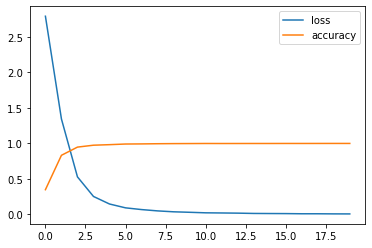

In [ ]:
pd.DataFrame(history7.history).plot();

In [ ]:
model7.evaluate(val_data)

63/63 [==============================] - 3s 33ms/step - loss: 1.2309 - accuracy: 0.6300


[1.2308982610702515, 0.6299999952316284]

In [ ]:
#splitting the data one more time for the final evaluation 
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
#Building functional model with keras.applications API 
input_shape = (200, 200, 3)
model7= tf.keras.applications.EfficientNetB0(include_top=False)
model7.trainalbe = False
inputs = tf.keras.layers.Input(shape= input_shape, name="input_layer")
#x = data_augmentation(inputs)
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = model7(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs =tf.keras.layers.Dense(29, activation="softmax")(x)
model7=keras.Model(inputs, outputs)


# Compile
model7.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(0.000023),
                     metrics=['accuracy'])


# Build the model
model7.build((200, 200, 3))

# Fit the model
#model7.fit(x= train_data,
            #epochs= 5)
history7 = model7.fit(x = train_data,
                      epochs=20)

Epoch 1/20
250/250 [==============================] - 51s 174ms/step - loss: 2.8340 - accuracy: 0.3321
Epoch 2/20
250/250 [==============================] - 43s 174ms/step - loss: 1.5130 - accuracy: 0.7878
Epoch 3/20
250/250 [==============================] - 43s 174ms/step - loss: 0.6460 - accuracy: 0.9254
Epoch 4/20
250/250 [==============================] - 44s 174ms/step - loss: 0.2936 - accuracy: 0.9666
Epoch 5/20
250/250 [==============================] - 44s 174ms/step - loss: 0.1692 - accuracy: 0.9812
Epoch 6/20
250/250 [==============================] - 44s 174ms/step - loss: 0.1048 - accuracy: 0.9887
Epoch 7/20
250/250 [==============================] - 44s 174ms/step - loss: 0.0729 - accuracy: 0.9901
Epoch 8/20
250/250 [==============================] - 43s 174ms/step - loss: 0.0545 - accuracy: 0.9935
Epoch 9/20
250/250 [==============================] - 44s 174ms/step - loss: 0.0406 - accuracy: 0.9961
Epoch 10/20
250/250 [==============================] - 43s 173ms/step - l

In [ ]:
#X_val = np.array(X_val)
#y_val = np.array(y_val)

#X_test = tf.constant(X_val)
#y_test = tf.constant(y_val)

X_test = tf.reshape(X_val)

X_test.tonumpy()[0]



TypeError: ignored

In [ ]:
model7.evaluate(X_test, y_test)

ValueError: ignored